<a href="https://colab.research.google.com/github/1kaiser/test2022/blob/main/SENTINEL_data_download_AllBands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# googlecloud data

In [5]:
from google.cloud import storage


def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    # bucket_name = "your-bucket-name"

    storage_client = storage.Client()

    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs(bucket_name)

    for blob in blobs:
        print(blob.name)



In [8]:
!gsutil -m cp \
  "gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2B_MSIL1C_20220820T053649_N0400_R005_T43SFR_20220820T073622.SAFE/GRANULE/L1C_T43SFR_A028488_20220820T054215/IMG_DATA/T43SFR_20220820T053649_B03.jp2" \
  "gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2B_MSIL1C_20220820T053649_N0400_R005_T43SFR_20220820T073622.SAFE/GRANULE/L1C_T43SFR_A028488_20220820T054215/IMG_DATA/T43SFR_20220820T053649_B11.jp2" \
  .

Copying gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2B_MSIL1C_20220820T053649_N0400_R005_T43SFR_20220820T073622.SAFE/GRANULE/L1C_T43SFR_A028488_20220820T054215/IMG_DATA/T43SFR_20220820T053649_B03.jp2...
Copying gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2B_MSIL1C_20220820T053649_N0400_R005_T43SFR_20220820T073622.SAFE/GRANULE/L1C_T43SFR_A028488_20220820T054215/IMG_DATA/T43SFR_20220820T053649_B11.jp2...
/ [2/2 files][ 92.2 MiB/ 92.2 MiB] 100% Done                                    
Operation completed over 2 objects/92.2 MiB.                                     


In [1]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=q0E6hUkuVig4ap8mUDlD3YzAScwX9p&prompt=consent&access_type=offline&code_challenge=toXGH9fZWwdt6BzlW0wttdTue_s0iLW3NWZhOYrNc38&code_challenge_method=S256

Enter authorization code: 4/0AdQt8qiqOI_OdoUnSJOVLVzhlRcnIfUA005NXj2e43lVIZ8JCKlhMBpFMqOBM-9tKg7YKg

You are now logged in as ce312@nith.ac.in].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [50]:
FRdata = []
GRdata = []
ERdata = []
FQdata = []
GQdata = []
expression = ".SAFE/"
ERdata = !gsutil ls "gs://gcp-public-data-sentinel-2/tiles/43/S/ER/"
FRdata = !gsutil ls "gs://gcp-public-data-sentinel-2/tiles/43/S/FR/"
GRdata = !gsutil ls "gs://gcp-public-data-sentinel-2/tiles/43/S/GR/"
FQdata = !gsutil ls "gs://gcp-public-data-sentinel-2/tiles/43/R/FQ/"
GQdata = !gsutil ls "gs://gcp-public-data-sentinel-2/tiles/43/R/GQ/"
ERdata =  [f for f in ERdata if f.__contains__(expression)]
ERdata.sort()
FRdata =  [f for f in FRdata if f.__contains__(expression)]
FRdata.sort()
GRdata =  [f for f in GRdata if f.__contains__(expression)]
GRdata.sort()
FQdata =  [f for f in FQdata if f.__contains__(expression)]
FQdata.sort()
GQdata =  [f for f in GQdata if f.__contains__(expression)]
GQdata.sort()
print(len(ERdata),len(FRdata),len(GRdata),len(FQdata),len(GQdata))
# len(data)



484 828 412 904 409


In [89]:
ERdata[4][57:-49]


'201509'

In [92]:
ERdata_dates = []
for i, f in enumerate(ERdata):
  ERdata_dates.append(ERdata[i][57:-49])
ERdata_dates.sort()
len(ERdata_dates)
############################################
FRdata_dates = []
for i, f in enumerate(FRdata):
  FRdata_dates.append(FRdata[i][57:-49])
FRdata_dates.sort()
len(FRdata_dates)
############################################
GRdata_dates = []
for i, f in enumerate(GRdata):
  GRdata_dates.append(GRdata[i][57:-49])
GRdata_dates.sort()
len(GRdata_dates)\
############################################
FQdata_dates = []
for i, f in enumerate(FQdata):
  FQdata_dates.append(FQdata[i][57:-49])
FQdata_dates.sort()
len(FQdata_dates)
############################################
GQdata_dates = []
for i, f in enumerate(GQdata):
  GQdata_dates.append(GQdata[i][57:-49])
GQdata_dates.sort()
len(GQdata_dates)

common = [x for x in ERdata_dates if x in FRdata_dates]
print(len(common))
common = [x for x in common if x in GRdata_dates]
print(len(common))
common = [x for x in common if x in FQdata_dates]
print(len(common))
common = [x for x in common if x in GQdata_dates]
print(len(common))
common

475
461
461
461


['201512',
 '201512',
 '201601',
 '201601',
 '201601',
 '201601',
 '201602',
 '201602',
 '201603',
 '201603',
 '201603',
 '201603',
 '201603',
 '201603',
 '201605',
 '201605',
 '201605',
 '201605',
 '201605',
 '201605',
 '201606',
 '201606',
 '201606',
 '201606',
 '201606',
 '201606',
 '201607',
 '201607',
 '201607',
 '201607',
 '201607',
 '201607',
 '201608',
 '201608',
 '201608',
 '201608',
 '201608',
 '201608',
 '201609',
 '201609',
 '201609',
 '201609',
 '201609',
 '201609',
 '201609',
 '201609',
 '201610',
 '201610',
 '201610',
 '201610',
 '201610',
 '201610',
 '201611',
 '201611',
 '201611',
 '201611',
 '201611',
 '201611',
 '201612',
 '201612',
 '201612',
 '201612',
 '201701',
 '201701',
 '201702',
 '201702',
 '201703',
 '201703',
 '201703',
 '201703',
 '201704',
 '201704',
 '201704',
 '201705',
 '201705',
 '201705',
 '201706',
 '201706',
 '201707',
 '201707',
 '201707',
 '201707',
 '201707',
 '201707',
 '201708',
 '201708',
 '201708',
 '201708',
 '201708',
 '201708',
 '201708',

In [51]:
FRdata

['gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151120T054122_N0204_R005_T43SFR_20151120T054952.SAFE/',
 'gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151120T054122_N0204_R005_T43SFR_20170224T150956.SAFE/',
 'gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151120T054122_N0204_R005_T43SFR_20170507T061417.SAFE/',
 'gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151130T054752_N0204_R005_T43SFR_20151130T054750.SAFE/',
 'gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151130T054752_N0204_R005_T43SFR_20170513T063019.SAFE/',
 'gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151130T055514_N0200_R005_T43SFR_20151201T171437.SAFE/',
 'gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151207T053212_N0204_R105_T43SFR_20151207T053215.SAFE/',
 'gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151207T053212_N0204_R105_T43SFR_20170528T170547.SAFE/',
 'gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151

In [44]:
ast = []
!gsutil ls "{data[5]}"GRANULE
ast = !gsutil ls "{data[5]}"GRANULE
expression_bxxx = "/"
ast = [f for f in ast if f.endswith(expression_bxxx)]


gs://gcp-public-data-sentinel-2/tiles/43/S/ER/S2A_MSIL1C_20151001T055016_N0204_R005_T43SER_20151001T055013.SAFE/GRANULE/L1C_T43SER_A001432_20151001T055013_$folder$
gs://gcp-public-data-sentinel-2/tiles/43/S/ER/S2A_MSIL1C_20151001T055016_N0204_R005_T43SER_20151001T055013.SAFE/GRANULE/L1C_T43SER_A001432_20151001T055013/


In [45]:
ast

['gs://gcp-public-data-sentinel-2/tiles/43/S/ER/S2A_MSIL1C_20151001T055016_N0204_R005_T43SER_20151001T055013.SAFE/GRANULE/L1C_T43SER_A001432_20151001T055013/']

In [46]:
img_datas =[]
img_datas = !gsutil ls "{ast[0]}"IMG_DATA
expression_b3 = "B03.jp2"
expression_b11 = "B11.jp2"

band_b3 =  [f for f in img_datas if f.__contains__(expression_b3)]
band_b11 =  [f for f in img_datas if f.__contains__(expression_b11)]
band_b3[0]
band_b11[0]
!gsutil -m cp \
  "{band_b3[0]}" \
  "{band_b11[0]}" \
  .

Copying gs://gcp-public-data-sentinel-2/tiles/43/S/ER/S2A_MSIL1C_20151001T055016_N0204_R005_T43SER_20151001T055013.SAFE/GRANULE/L1C_T43SER_A001432_20151001T055013/IMG_DATA/T43SER_20151001T055016_B03.jp2...
Copying gs://gcp-public-data-sentinel-2/tiles/43/S/ER/S2A_MSIL1C_20151001T055016_N0204_R005_T43SER_20151001T055013.SAFE/GRANULE/L1C_T43SER_A001432_20151001T055013/IMG_DATA/T43SER_20151001T055016_B11.jp2...
- [2/2 files][  9.1 MiB/  9.1 MiB] 100% Done                                    
Operation completed over 2 objects/9.1 MiB.                                      


0...10...20...30...40...50...60...70...80...90...100 - done.


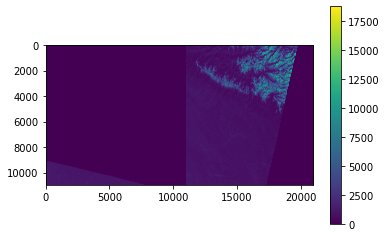

In [48]:
!gdal_merge.py -o out.tif \
  /content/S2A_OPER_MSI_L1C_TL_SGS__20151130T130633_A002290_T43SFR_B03.jp2 \
  /content/T43SER_20151001T055016_B03.jp2

import os
import subprocess
from osgeo import gdal
import matplotlib.pyplot as plt

#os.system (cmd)
slp1=gdal.Open("/content/out.tif")
slp1Array= slp1.GetRasterBand(1).ReadAsArray()
plt.figure()
plt.imshow(slp1Array)
plt.colorbar()
plt.show()

In [2]:
!gsutil -m cp -r \
  "gs://gcp-public-data-sentinel-2/tiles/43/S/FR" \
  .

Copying gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151120T054122_N0204_R005_T43SFR_20151120T054952.SAFE/DATASTRIP/DS_EPA__20170507T040733_S20151120T054952/MTD_DS.xml...
Copying gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151120T054122_N0204_R005_T43SFR_20151120T054952.SAFE/GRANULE/L1C_T43SFR_A002147_20151120T054952/IMG_DATA/T43SFR_20151120T054122_B01.jp2...
Copying gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151120T054122_N0204_R005_T43SFR_20151120T054952.SAFE/GRANULE/L1C_T43SFR_A002147_20151120T054952/IMG_DATA/T43SFR_20151120T054122_B02.jp2...
Copying gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151120T054122_N0204_R005_T43SFR_20151120T054952.SAFE/GRANULE/L1C_T43SFR_A002147_20151120T054952/IMG_DATA/T43SFR_20151120T054122_B03.jp2...
Copying gs://gcp-public-data-sentinel-2/tiles/43/S/FR/S2A_MSIL1C_20151120T054122_N0204_R005_T43SFR_20151120T054952.SAFE/GRANULE/L1C_T43SFR_A002147_20151120T054952/AUX_DATA/AUX_ECMWFT...
Copying gs:

# connect to copernicus eu

In [ ]:
!wget https://scihub.copernicus.eu/twiki/pub/SciHubUserGuide/BatchScripting/dhusget.sh

--2022-08-16 15:01:03--  https://scihub.copernicus.eu/twiki/pub/SciHubUserGuide/BatchScripting/dhusget.sh
Resolving scihub.copernicus.eu (scihub.copernicus.eu)... 146.59.215.226
Connecting to scihub.copernicus.eu (scihub.copernicus.eu)|146.59.215.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36971 (36K) [application/x-sh]
Saving to: ‘dhusget.sh’

dhusget.sh          100%[===================>]  36.10K  --.-KB/s    in 0.09s   

2022-08-16 15:01:04 (389 KB/s) - ‘dhusget.sh’ saved [36971/36971]



In [ ]:
#@title downloading the links per page from the query { vertical-output: true }
pages = 40 #@param {type:"integer"}
start_date = "2000-08-15" #@param {type:"date"}
end_date = "2022-08-15" #@param {type:"date"}
links_per_page = 50

from google.colab import output
temp_dir = "/content/gogogo/"
!mkdir -p {temp_dir}

for i in range(1,pages):
  !bash /content/dhusget.sh \
    -u 1kaiser -p hV@dkL4x7yTkzp+ \
    -d https://scihub.copernicus.eu/dhus/ \
    -m Sentinel-2 \
    -s {start_date}T06:00:00.000Z \
    -e {end_date}T06:00:00.000Z \
    -c 75.71,32.47:78.02,31.34 \
    -C {temp_dir}products-list{i}.csv \
    -T S2MSI2A \
    -l 100 \
    -P {i} 
  output.clear() #to_clear_the_output_console_everytime

In [ ]:
import pandas as pd
import glob
import os
from google.colab import output
temp_dir = "/content/gogogo/"
################################################################################
!gdown https://drive.google.com/uc?id=1WsPIKyvrV8vVrJEySp6S2y-23Mu_s7eF

################################################################################
files = os.path.join(temp_dir, "products-list*.csv")
print(glob.glob(files))
files = glob.glob(files)
master_file = pd.read_csv('/content/output.csv')
for csv_file in files:
  df = pd.read_csv(csv_file)
  df.to_csv('/content/output.csv', mode = 'a', header = False, index = False)
################################################################################ 
# 1. Open the CSV file in reading mode and the TXT file in writing mode
with open('/content/output.csv', 'r') as f_in, open('/content/my_file.txt', 'w') as f_out:
    # 2. Read the CSV file and store in variable
    content = f_in.read()
    # 3. Write the content into the TXT file
    f_out.write(content)
################################################################################
yoyo =[]
links =open("/content/my_file.txt", 'r')
link_list = [f for f in links]
for i in range(len(link_list)):
  yoyo.append(link_list[i].split(","))
K = yoyo[7][1][:-1]


In [ ]:
################################################################################
%cd /content/drive/MyDrive/OUT/data/sentinel/S2MSI2A_1/
################################################################################
print(K)
for i in range(len(yoyo)):
  K = yoyo[i][1][:-1]
  t1 = str('/\$value')
  B = K+t1
  !wget --content-disposition --continue --user=1kaiser --password=hV@dkL4x7yTkzp+ "{B}"
  output.clear() #to_clear_the_output_console_everytime
################################################################################
%cd /content/
################################################################################

In [ ]:
!wget --content-disposition --continue --user=1kaiser --password=hV@dkL4x7yTkzp+ "https://scihub.copernicus.eu/dhus/odata/v1/Products('87494e58-978e-48a2-8d76-0c573ad0050b')/\$value"

--2022-08-16 15:56:50--  https://scihub.copernicus.eu/dhus/odata/v1/Products('87494e58-978e-48a2-8d76-0c573ad0050b')/$value
Resolving scihub.copernicus.eu (scihub.copernicus.eu)... 146.59.215.226
Connecting to scihub.copernicus.eu (scihub.copernicus.eu)|146.59.215.226|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="OData service"
Connecting to scihub.copernicus.eu (scihub.copernicus.eu)|146.59.215.226|:443... connected.
HTTP request sent, awaiting response... 202 Accepted
Length: 0 [text/plain]
--2022-08-16 15:56:51--  https://scihub.copernicus.eu/dhus/odata/v1/Products('87494e58-978e-48a2-8d76-0c573ad0050b')/$value
Reusing existing connection to scihub.copernicus.eu:443.
HTTP request sent, awaiting response... 403 Forbidden
2022-08-16 15:56:53 ERROR 403: Forbidden.

